In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-diagnosis-dataset/breast_cancer_dataset_medium.csv


In [2]:
# Imports

import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
# Importing the dataset

filepath = '/kaggle/input/breast-cancer-diagnosis-dataset/breast_cancer_dataset_medium.csv'
df = pd.read_csv(filepath)

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension
0,1,M,7.14,14.65,43.11,743.05,0.1282,0.1791,0.1863,0.0760
1,2,B,17.69,8.85,105.40,3963.38,0.1964,0.3989,0.1758,0.0708
2,3,M,17.89,13.81,90.37,3453.29,0.0688,0.2280,0.2830,0.0573
3,4,M,20.02,26.66,113.76,5402.59,0.0525,0.1353,0.1502,0.0404
4,5,M,21.97,21.49,126.56,6741.27,0.1655,0.0958,0.2688,0.0698


In [4]:
# Encoding the diagnosis feature, malignant = 1, benign = 0. For later machine learning purposes.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['diagnosis_enc'] = le.fit_transform(df['diagnosis'])

In [5]:
df.count()

id                   600
diagnosis            600
radius_mean          600
texture_mean         600
perimeter_mean       600
area_mean            600
smoothness_mean      600
compactness_mean     600
symmetry_mean        600
fractal_dimension    600
diagnosis_enc        600
dtype: int64

- No missing values, dataset is ready for model training after scaling. 

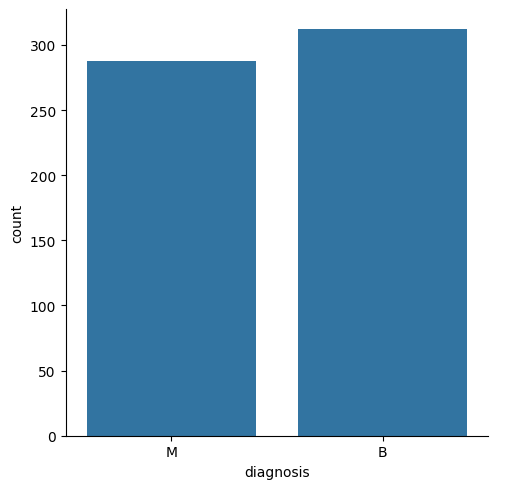

In [6]:
# Seeing split of malignant vs. benign tumours.

sns.catplot(data=df,x = 'diagnosis',kind='count')

## Creating a simple logistic regression classification model

In [7]:
# Importing, train/test splitting dataset

from sklearn.linear_model import LogisticRegression

cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean','compactness_mean','symmetry_mean','fractal_dimension']
X = df[cols]
y = df['diagnosis_enc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12)

In [8]:
# Scaling parameters

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Training model

model = LogisticRegression().fit(X_train,y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# Making predictions

preds = model.predict(X_test)


In [11]:
# Assessing model. 

accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)

print('Accuracy: ' + str(accuracy) + "\n"
     + 'Precision: ' + str(precision) + "\n"
     + 'Recall: ' + str(recall) + "\n" 
     + 'F1: ' + str(f1))

Accuracy: 0.475
Precision: 0.4358974358974359
Recall: 0.29310344827586204
F1: 0.35051546391752575


We can see that the simple logistic regression model trained on all the parameters performs slightly better than random guessing. If we wish to improve upon this, we can try different combinations of features, or tune the parameters themselves.

### Random Forest Regression model

In [12]:
from sklearn.ensemble import RandomForestClassifier

forestModel = RandomForestClassifier(n_estimators=100, random_state=22).fit(X_train, y_train)

predsF = forestModel.predict(X_test)

In [13]:
# Assessing Forest Model

accuracyF = accuracy_score(y_test, predsF)
precisionF = precision_score(y_test, predsF)
recallF = recall_score(y_test, predsF)
f1F = f1_score(y_test, predsF)

print('Accuracy: ' + str(accuracyF) + "\n"
     + 'Precision: ' + str(precisionF) + "\n"
     + 'Recall: ' + str(recallF) + "\n" 
     + 'F1: ' + str(f1F))

Accuracy: 0.5333333333333333
Precision: 0.5217391304347826
Recall: 0.41379310344827586
F1: 0.46153846153846156


The forest model clearly has better performance compared to the logistic regression model. and may do even better if trained on different features. However, it should be noted that 53% accuracy is not a desirable score, and we can do better.